# Keras Modeling--Random Forest--Top 3 Stations

## Import Libraries and Data

### Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score

### Datasets

In [2]:
# create path

path = r"C:\Users\18478\OneDrive\Desktop\Career Foundry Data Analytics Course\Career Foundry Machine Learning"

In [3]:
# Import weather dataset

climate = pd.read_csv(os.path.join(path, 'Data Sets', 'Unsupervised', 'weather_dataset_unscaled_prepared_with_date.csv'))

In [4]:
# check output

climate.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,19600104,1,3,0.92,1.018,0.58,0.00,4.1,6.3,3.8,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,19600105,1,6,0.95,1.018,0.65,0.14,5.4,3.0,-0.7,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4


In [5]:
# check output

climate.shape

(22950, 137)

In [6]:
# Import the 'Pleasant weather' dataset

pleasantweather = pd.read_csv(os.path.join(path, 'Data Sets', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

## Basel Station

### Prepping Basel Station Datasets

In [7]:
# Filter for columns related to 'BASEL' station
basel_station = [x for x in climate.columns if 'BASEL' in x.upper()]

# Create a new DataFrame for Basel station data
basel_df = climate[basel_station]

# Check output
basel_df

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
0,7,0.85,1.0180,0.32,0.09,0.7,6.5,0.8,10.9
1,6,0.84,1.0180,0.36,1.05,1.1,6.1,3.3,10.1
2,8,0.90,1.0180,0.18,0.30,0.0,8.5,5.1,9.9
3,3,0.92,1.0180,0.58,0.00,4.1,6.3,3.8,10.6
4,6,0.95,1.0180,0.65,0.14,5.4,3.0,-0.7,6.0
...,...,...,...,...,...,...,...,...,...
22945,1,0.79,1.0248,1.34,0.22,7.7,15.9,11.4,21.4
22946,6,0.77,1.0244,1.34,0.22,5.4,16.7,14.3,21.9
22947,4,0.76,1.0227,1.34,0.22,6.1,16.7,13.1,22.4
22948,5,0.80,1.0212,1.34,0.22,5.8,15.4,11.6,21.1


In [8]:
# Reduce pleasantweather dataset to Basel's data only

pleasantweather_basel = pleasantweather['BASEL_pleasant_weather']

pleasantweather_basel

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: BASEL_pleasant_weather, Length: 22950, dtype: int64

In [9]:
#Check the shape

basel_df.shape 

(22950, 9)

In [10]:
#Check the shape

pleasantweather_basel.shape

(22950,)

### Prepping Basel Station Parameters and Train/Test Sets

In [11]:
# Define features and target for Basel

X_basel = basel_df  # Basel weather features
y_basel = pleasantweather['BASEL_pleasant_weather']  # Basel target labels

# Convert to NumPy arrays

X = np.array(X_basel)
y = np.array(y_basel) # as previously described - these tools expect the data to be in a clean, fast format - "NumPy arrays".

In [12]:
X.shape

(22950, 9)

In [13]:
y.shape

(22950,)

In [14]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [15]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


### Running Random Forest Model for Basel Station

In [16]:
# Initialize the Random Forest model
# This creates 100 decision trees and uses them together to make predictions
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Check how accurate the model is
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy on Test Set:", round(accuracy * 100, 2), "%")

Random Forest Accuracy on Test Set: 100.0 %


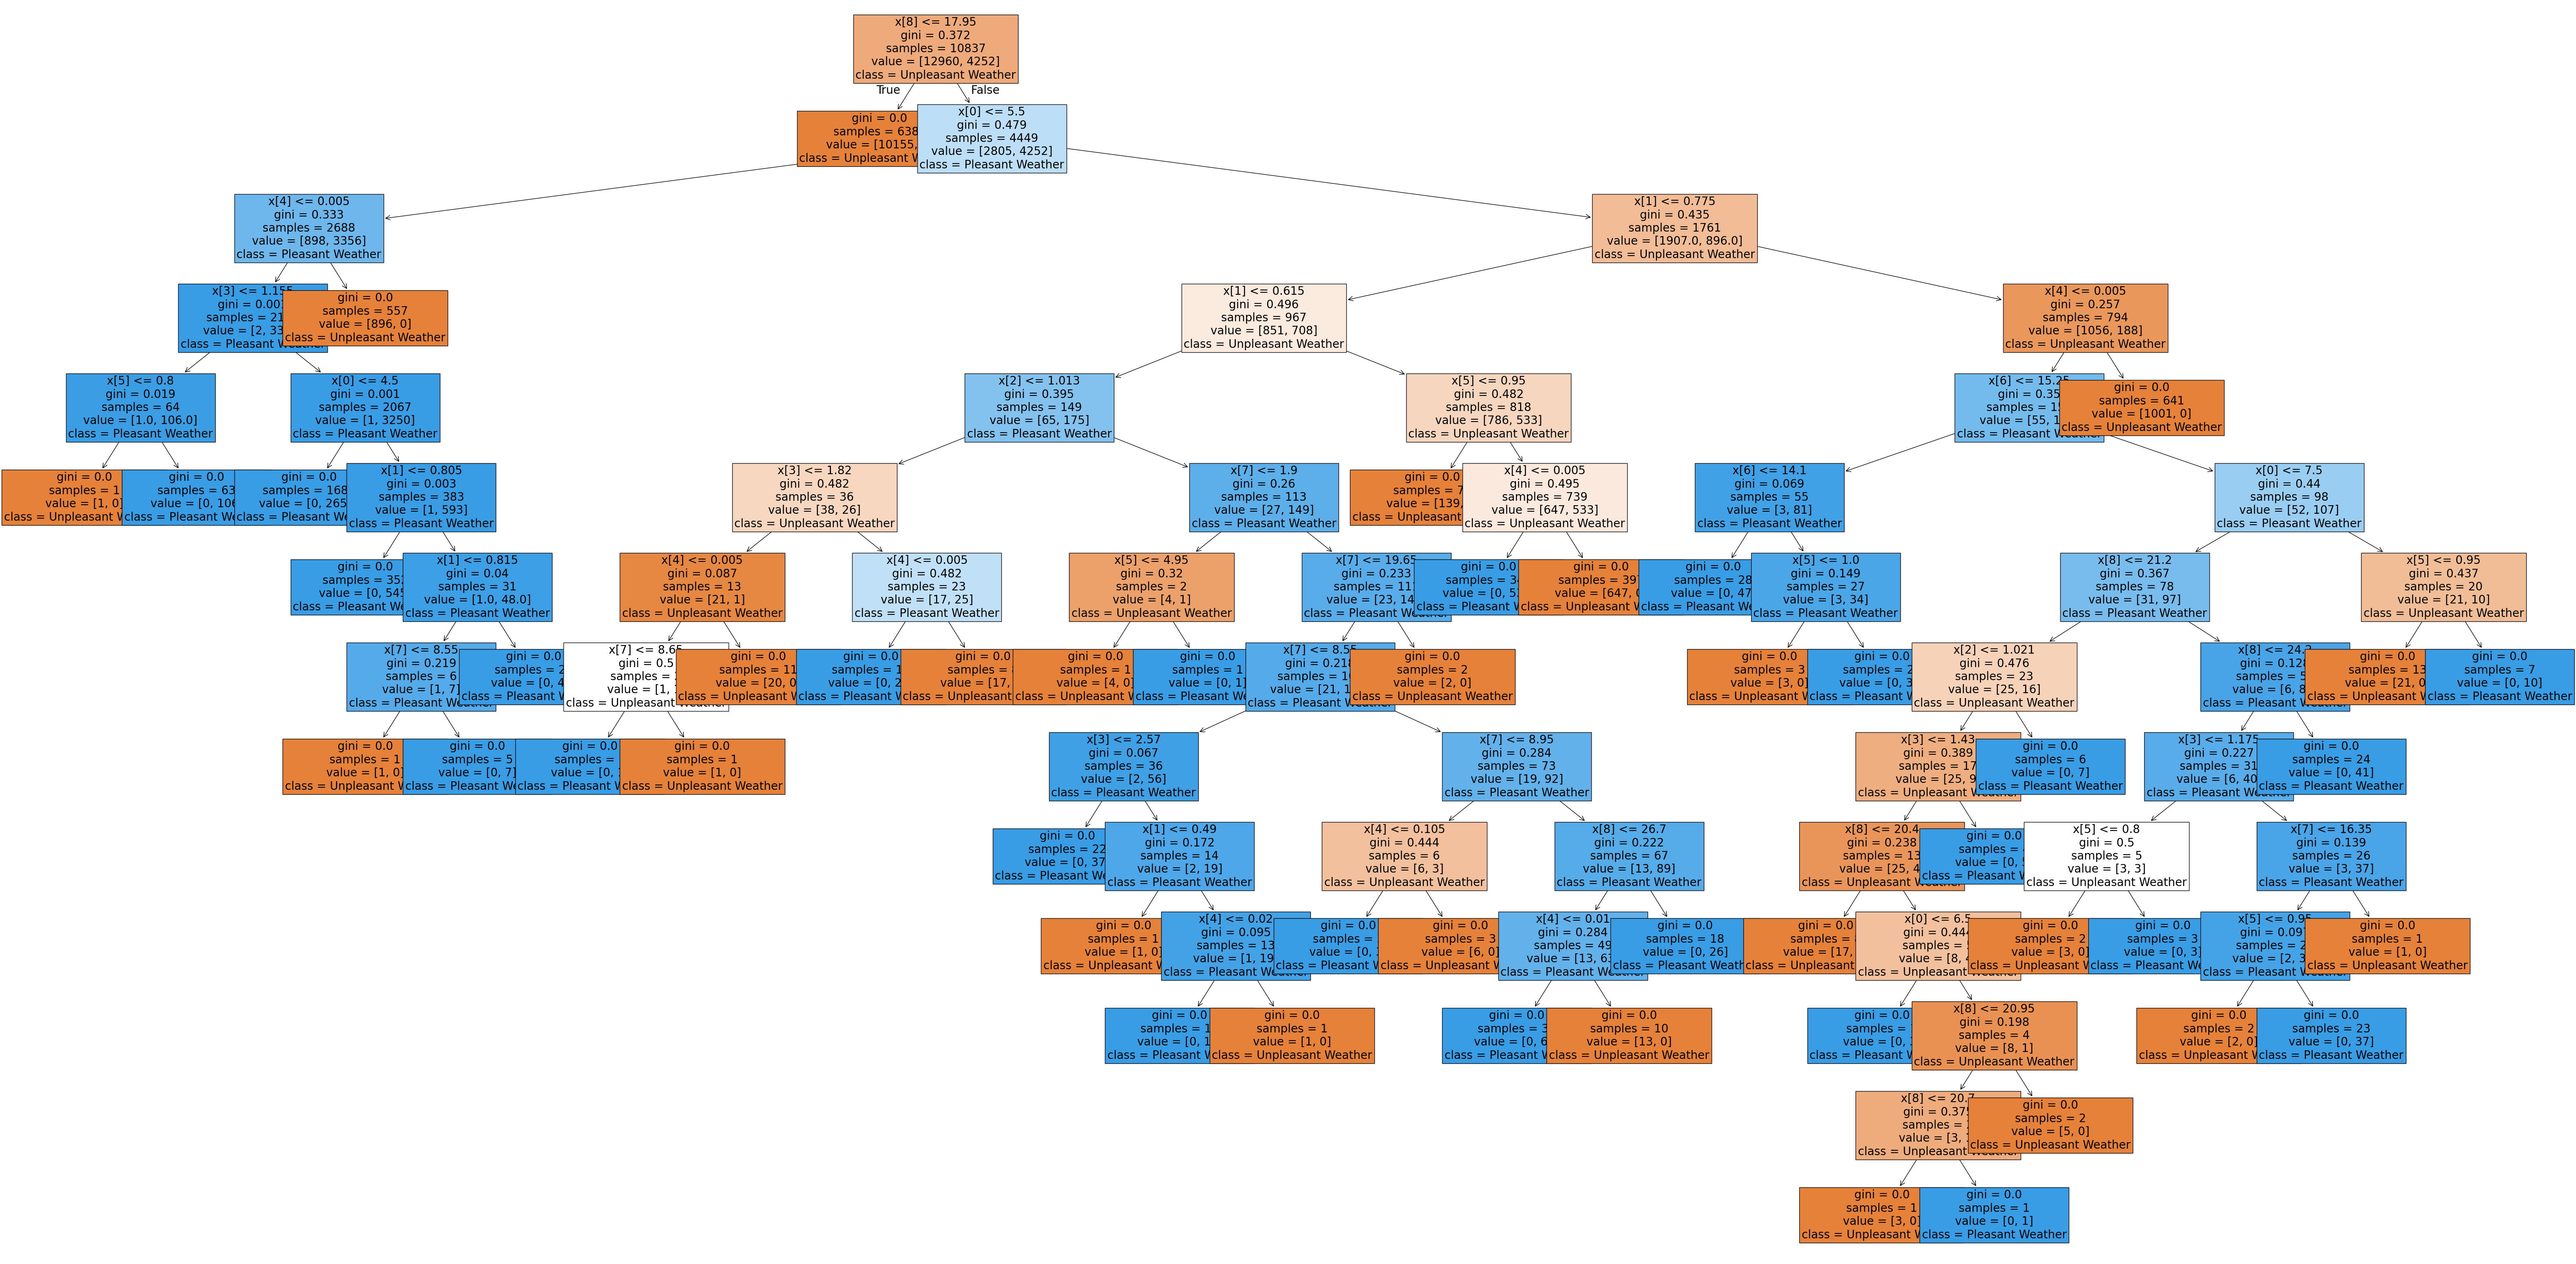

In [22]:
# Define class names for readability
class_names = ['Unpleasant Weather', 'Pleasant Weather']

# Plot the tree
fig = plt.figure(figsize=(80, 40))
plot_tree(clf.estimators_[15], 
          filled=True, 
          fontsize=20,
          feature_names=None,  # You can add your feature names here if you'd like
          class_names=class_names);  # Adds class labels at the leaves

# Save the figure before showing it
plt.savefig(os.path.join(path, 'Visualizations', 'random_forest_model_weather_prediction_Basel.png'), dpi=300, bbox_inches='tight')  # dpi and bbox are optional

### Importance Variables for Basel Station

In [18]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape) # Should print: (9,)
newarray # This shows the raw importance values

(9,)


array([0.02612365, 0.01131743, 0.00667535, 0.10666495, 0.34058348,
       0.12129856, 0.08800662, 0.03324133, 0.26608864])

In [19]:
# Clean feature names from BASEL columns

basel_features = [feature.replace('BASEL_', '') for feature in basel_station]
basel_features

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [21]:
# Create Series for feature importance

important = pd.Series(newarray, index=basel_features).sort_values(ascending=False)
important

precipitation       0.340583
temp_max            0.266089
sunshine            0.121299
global_radiation    0.106665
temp_mean           0.088007
temp_min            0.033241
cloud_cover         0.026124
humidity            0.011317
pressure            0.006675
dtype: float64

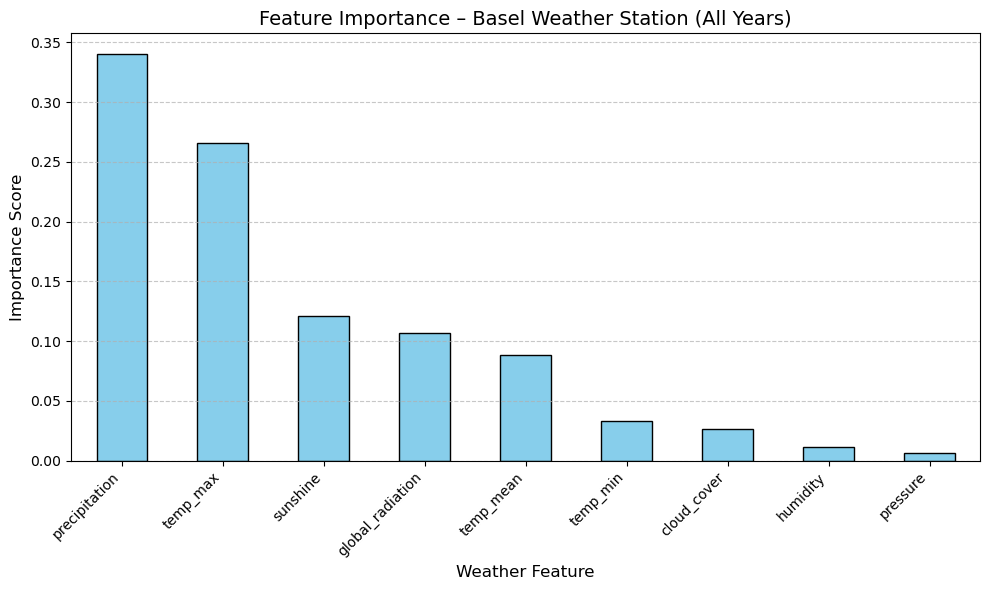

In [23]:
# Plot feature importance

plt.figure(figsize=(10, 6))
important.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Feature Importance – Basel Weather Station (All Years)', fontsize=14)
plt.xlabel('Weather Feature', fontsize=12)
plt.ylabel('Importance Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

# Save the figure before showing it
plt.savefig(os.path.join(path, 'Visualizations', 'bar_chart_Basel_station_importance.png'), dpi=300, bbox_inches='tight')  # dpi and bbox are optional

plt.show()

## Mucnhen Station

### Prepping Munchen Station Datasets

In [24]:
# Filter for columns related to 'München' station
München_station = [x for x in climate.columns if 'MUNCHENB' in x.upper()]

# Create a new DataFrame for München station data
München_df = climate[München_station]

München_df

,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max
0,5,0.67,1.0180,0.20,0.10,0.0,6.9,1.1,10.4
1,6,0.72,1.0180,0.61,0.30,5.1,6.2,4.2,10.2
2,6,0.91,1.0180,0.20,0.30,0.0,5.8,4.0,8.0
3,6,0.90,1.0180,0.20,0.01,0.0,3.9,3.2,5.4
4,5,0.85,1.0180,0.65,0.96,5.6,1.8,-3.0,6.0
...,...,...,...,...,...,...,...,...,...
22945,2,0.76,1.0248,1.37,0.26,9.7,14.3,8.3,22.2
22946,6,0.70,1.0244,1.37,0.26,7.7,16.1,8.9,26.1
22947,7,0.64,1.0227,1.37,0.26,6.8,17.4,11.2,26.2
22948,6,0.75,1.0212,1.37,0.26,8.3,14.5,9.2,23.5


In [25]:
# Reduce pleasantweather dataset to München's data only

pleasantweather_München = pleasantweather['MUNCHENB_pleasant_weather']

pleasantweather_München

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: MUNCHENB_pleasant_weather, Length: 22950, dtype: int64

In [26]:
#Check the shape

München_df.shape 

(22950, 9)

In [27]:
#Check the shape

pleasantweather_München.shape

(22950,)

### Prepping Munchen Station Parameters and Train/Test Sets

In [28]:
# Define features and target for München

X_München = München_df  # München weather features
y_München = pleasantweather['MUNCHENB_pleasant_weather']  # München target labels

# Convert to NumPy arrays

X = np.array(X_München)
y = np.array(y_München) # as previously described - these tools expect the data to be in a clean, fast format - "NumPy arrays".

In [29]:
X.shape

(22950, 9)

In [30]:
y.shape

(22950,)

In [31]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [32]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


### Running Random Forest Model for Munchen Station

In [33]:
# Initialize the Random Forest model
# This creates 100 decision trees and uses them together to make predictions
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Check how accurate the model is
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy on Test Set:", round(accuracy * 100, 2), "%")

Random Forest Accuracy on Test Set: 100.0 %


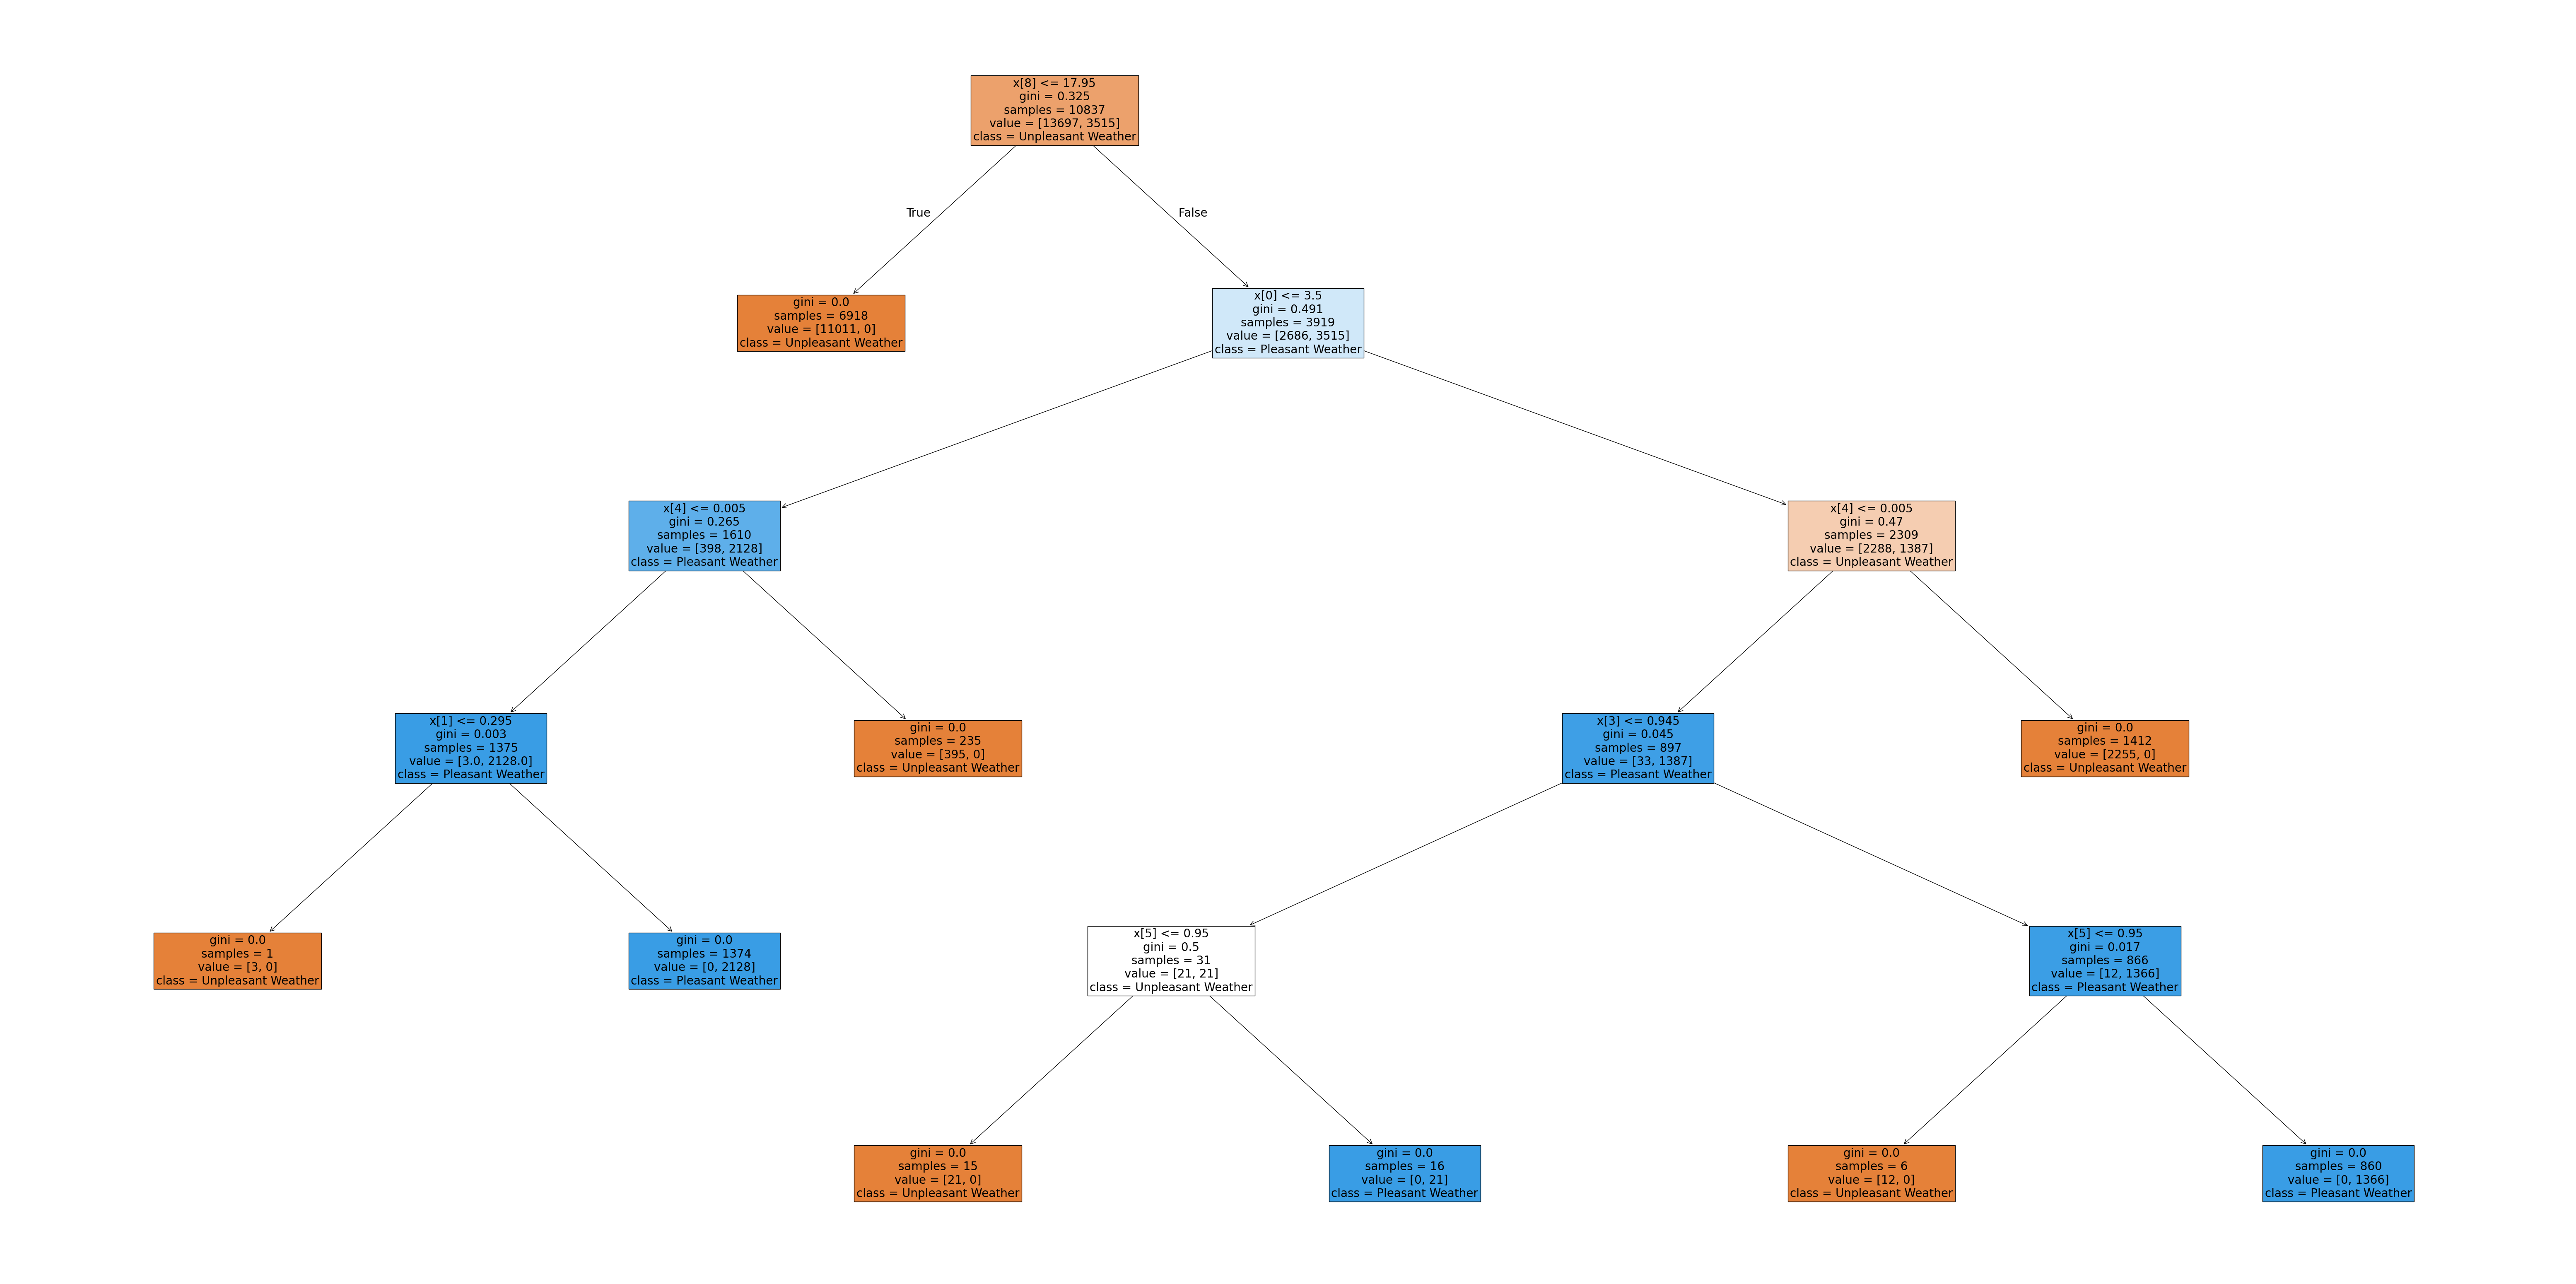

In [34]:
# Define class names for readability
class_names = ['Unpleasant Weather', 'Pleasant Weather']

# Plot the tree
fig = plt.figure(figsize=(80, 40))
plot_tree(clf.estimators_[15], 
          filled=True, 
          fontsize=20,
          feature_names=None,  # You can add your feature names here if you'd like
          class_names=class_names);  # Adds class labels at the leaves

# Save the figure 
plt.savefig(os.path.join(path, 'Visualizations', 'random_forest_model_weather_prediction_Munchen.png'), dpi=300, bbox_inches='tight')  # dpi and bbox are optional


### Importance Variables for Munchen Station

In [35]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape) # Should print: (9,)
newarray # This shows the raw importance values

(9,)


array([0.03322838, 0.01389816, 0.00323605, 0.05958838, 0.37296769,
       0.09439534, 0.11796735, 0.02686413, 0.2778545 ])

In [36]:
# Clean feature names from Maastricht columns

München_features = [feature.replace('MUNCHENB_', '') for feature in München_station]
München_features

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [37]:
# Create Series for feature importance

important = pd.Series(newarray, index=München_features).sort_values(ascending=False)
important

precipitation       0.372968
temp_max            0.277854
temp_mean           0.117967
sunshine            0.094395
global_radiation    0.059588
cloud_cover         0.033228
temp_min            0.026864
humidity            0.013898
pressure            0.003236
dtype: float64

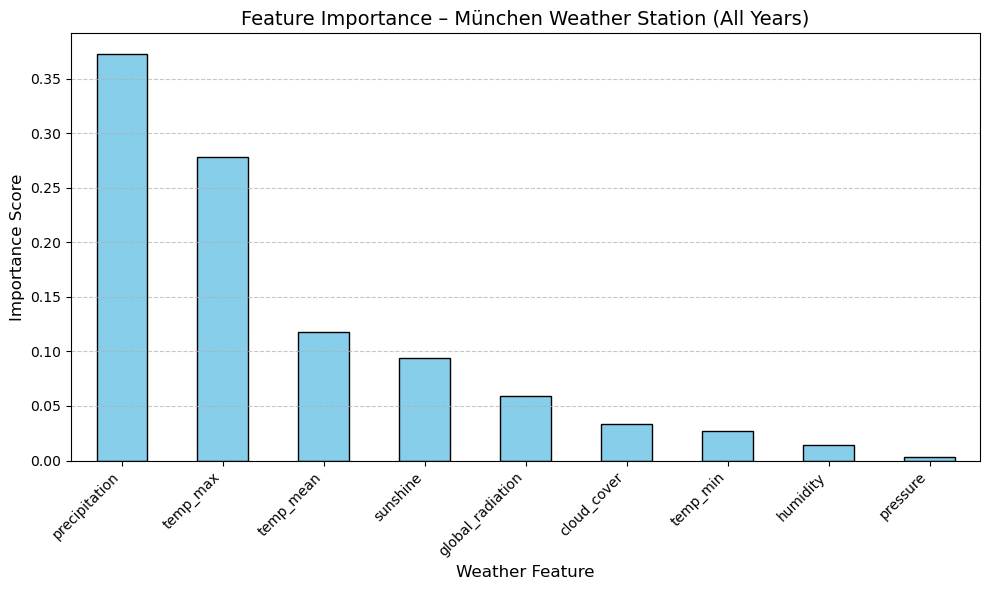

In [38]:
# Plot feature importance

plt.figure(figsize=(10, 6))
important.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Feature Importance – München Weather Station (All Years)', fontsize=14)
plt.xlabel('Weather Feature', fontsize=12)
plt.ylabel('Importance Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

# Save the figure before showing it
plt.savefig(os.path.join(path, 'Visualizations', 'bar_chart_Munchen_station_importance.png'), dpi=300, bbox_inches='tight')  # dpi and bbox are optional

plt.show()

## Maastricht Station

### Prepping Maastricht Station Datasets

In [39]:
# Filter for columns related to 'München' station
Maastricht_station = [x for x in climate.columns if 'MAASTRICHT' in x.upper()]

# Create a new DataFrame for Maastricht station data
Maastricht_df = climate[Maastricht_station]

Maastricht_df

,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max
0,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1
1,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9
2,7,0.97,1.0167,0.12,0.46,0.0,6.9,5.5,9.9
3,7,0.89,1.0277,0.16,0.00,0.3,7.0,3.0,10.0
4,7,0.92,1.0259,0.12,0.56,0.0,8.1,2.5,11.1
...,...,...,...,...,...,...,...,...,...
22945,8,0.67,1.0201,1.17,0.20,5.3,18.6,14.1,22.6
22946,7,0.70,1.0190,1.17,0.20,5.0,18.9,15.8,23.5
22947,8,0.69,1.0183,1.17,0.20,3.2,18.2,13.7,24.3
22948,8,0.73,1.0181,1.17,0.20,6.8,16.3,12.8,21.4


In [40]:
# Reduce pleasantweather dataset to Maastricht's data only

pleasantweather_Maastricht = pleasantweather['MAASTRICHT_pleasant_weather']

pleasantweather_Maastricht

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: MAASTRICHT_pleasant_weather, Length: 22950, dtype: int64

In [41]:
#Check the shape

Maastricht_df.shape

(22950, 9)

In [42]:
#Check the shape

pleasantweather_Maastricht.shape

(22950,)

### Prepping Maastricht Station Parameters and Train/Test Sets

In [43]:
# Define features and target for Maastricht

X_Maastricht = Maastricht_df  # Maastricht weather features
y_Maastricht = pleasantweather['MAASTRICHT_pleasant_weather']  # Maastricht target labels

# Convert to NumPy arrays

X = np.array(X_Maastricht)
y = np.array(y_Maastricht) # as previously described - these tools expect the data to be in a clean, fast format - "NumPy arrays".

In [44]:
X.shape

(22950, 9)

In [45]:
y.shape

(22950,)

In [46]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [47]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


### Running Random Forest Model for Maastricht Station

In [48]:
# Initialize the Random Forest model
# This creates 100 decision trees and uses them together to make predictions
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Check how accurate the model is
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy on Test Set:", round(accuracy * 100, 2), "%")

Random Forest Accuracy on Test Set: 100.0 %


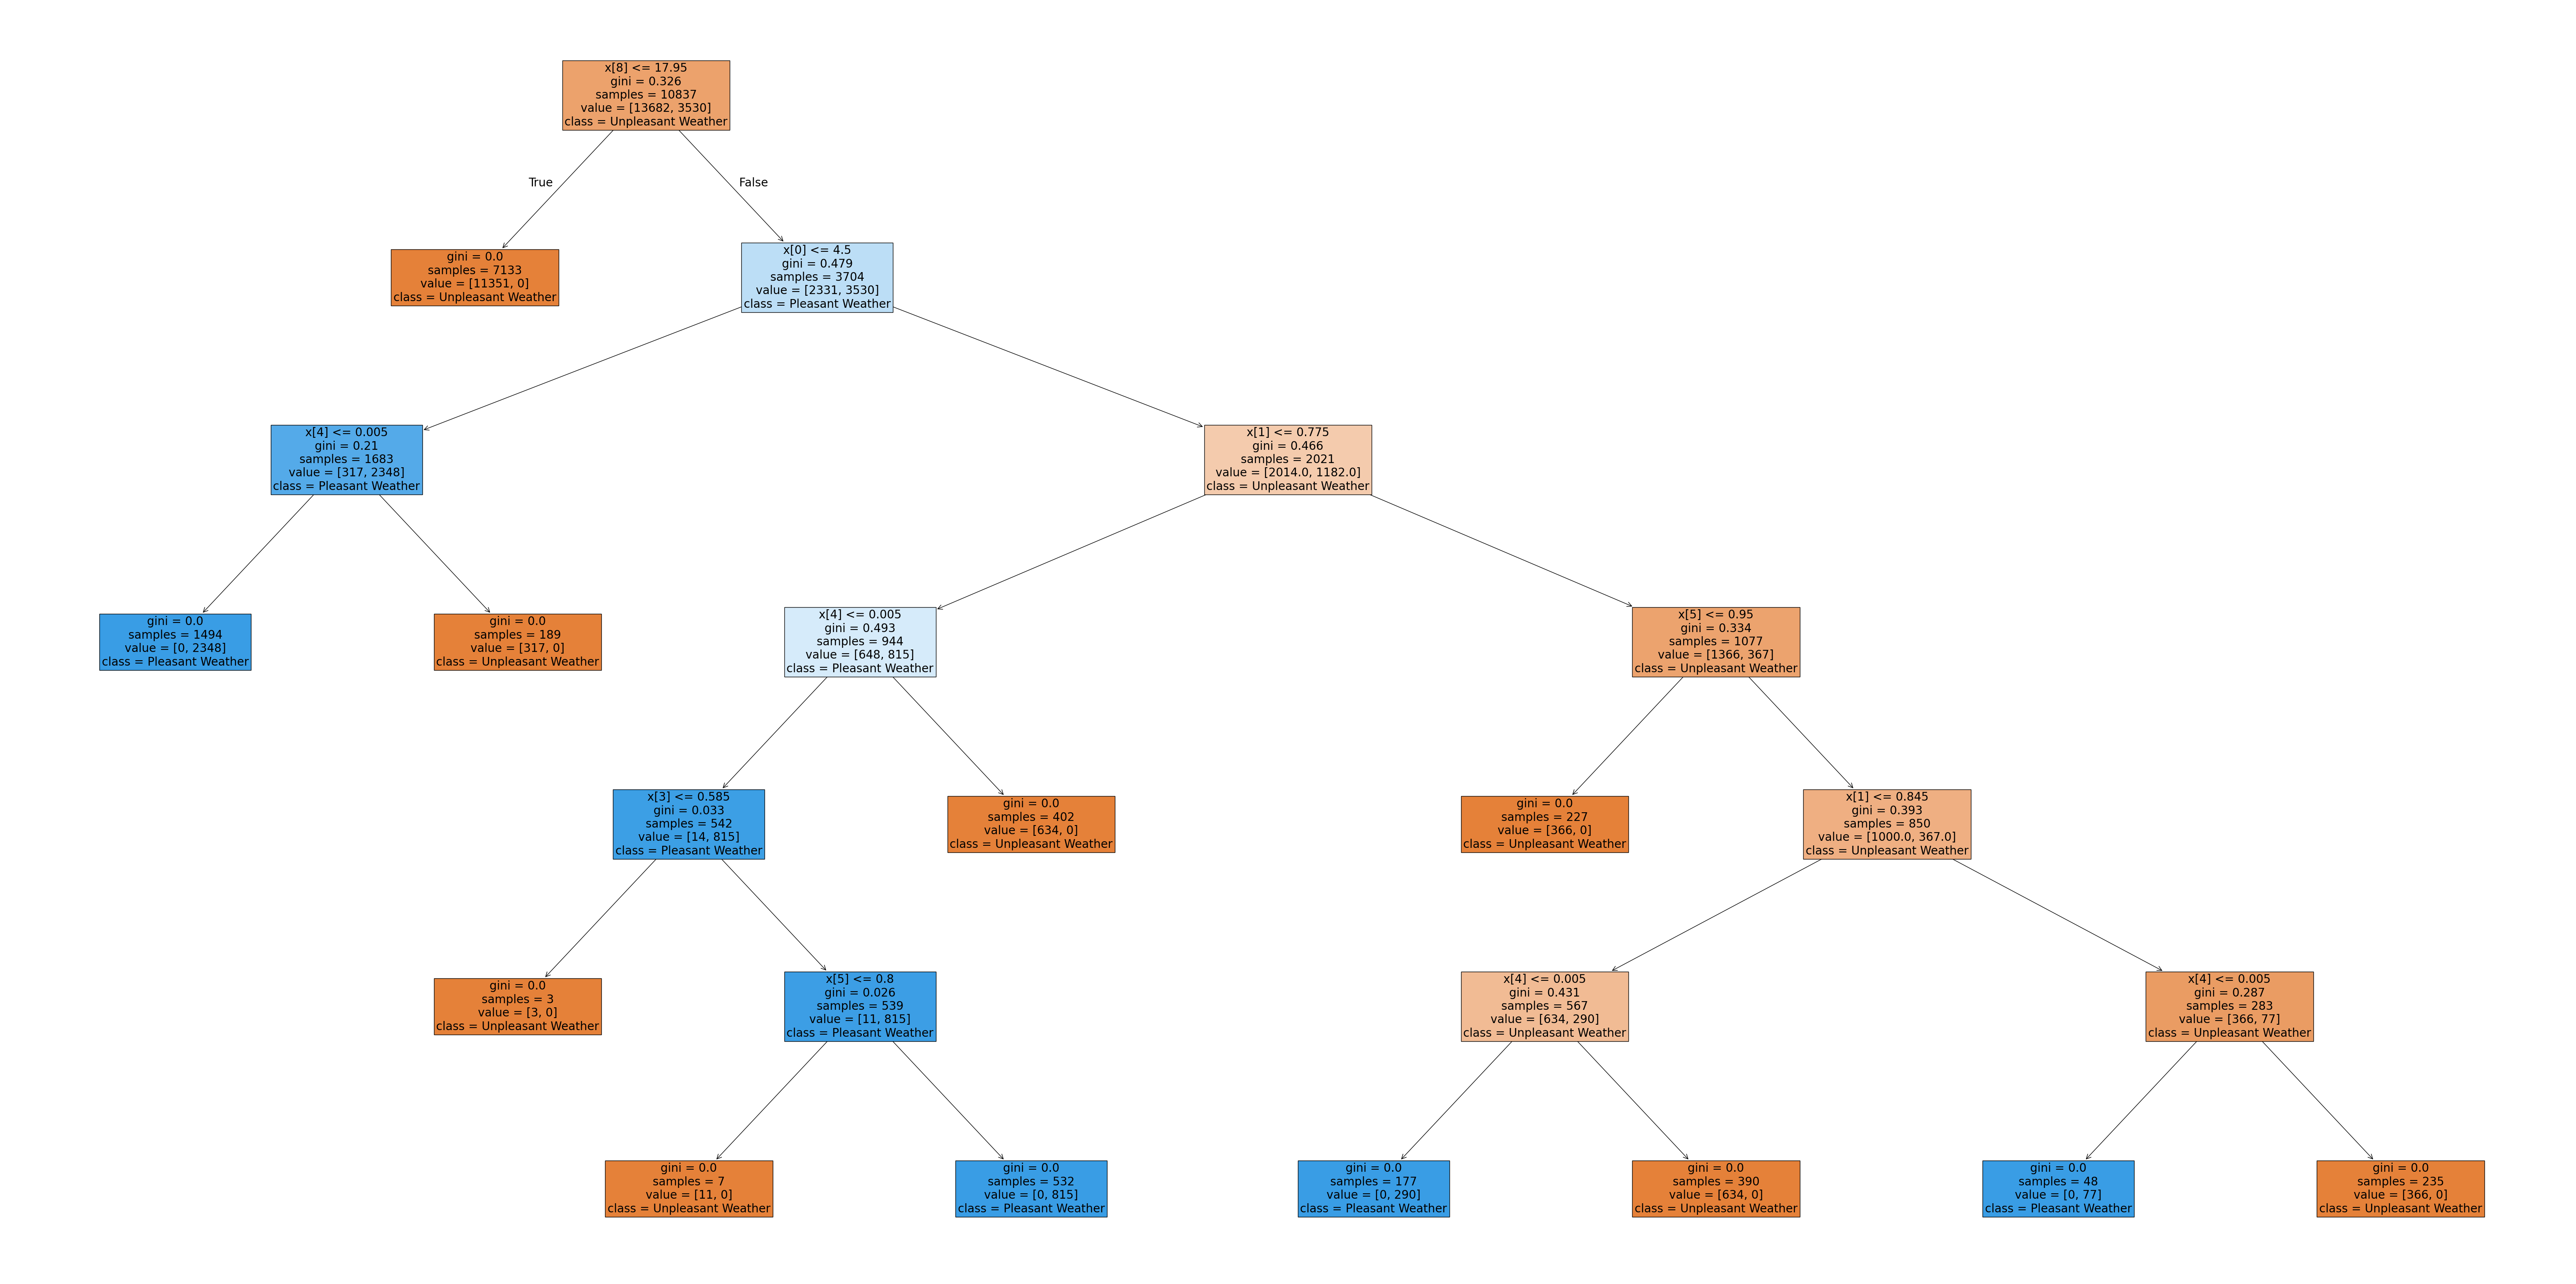

In [49]:
# Define class names for readability
class_names = ['Unpleasant Weather', 'Pleasant Weather']

# Plot the tree
fig = plt.figure(figsize=(80, 40))
plot_tree(clf.estimators_[15], 
          filled=True, 
          fontsize=20,
          feature_names=None,  # You can add your feature names here if you'd like
          class_names=class_names);  # Adds class labels at the leaves

# Save the figure 
plt.savefig(os.path.join(path, 'Visualizations', 'random_forest_model_weather_prediction_Maastricht.png'), dpi=300, bbox_inches='tight')  # dpi and bbox are optional


### Importance Variables for Maatsricht Station

In [50]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape) # Should print: (9,)
newarray # This shows the raw importance values

(9,)


array([0.02589165, 0.02854016, 0.0126022 , 0.09899427, 0.31861322,
       0.07640981, 0.12403364, 0.0267683 , 0.28814674])

In [51]:
# Clean feature names from Maastricht columns

Maastricht_features = [feature.replace('MAASTRICHT_', '') for feature in Maastricht_station]
Maastricht_features

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [52]:
# Create Series for feature importance

important = pd.Series(newarray, index=Maastricht_features).sort_values(ascending=False)
important

precipitation       0.318613
temp_max            0.288147
temp_mean           0.124034
global_radiation    0.098994
sunshine            0.076410
humidity            0.028540
temp_min            0.026768
cloud_cover         0.025892
pressure            0.012602
dtype: float64

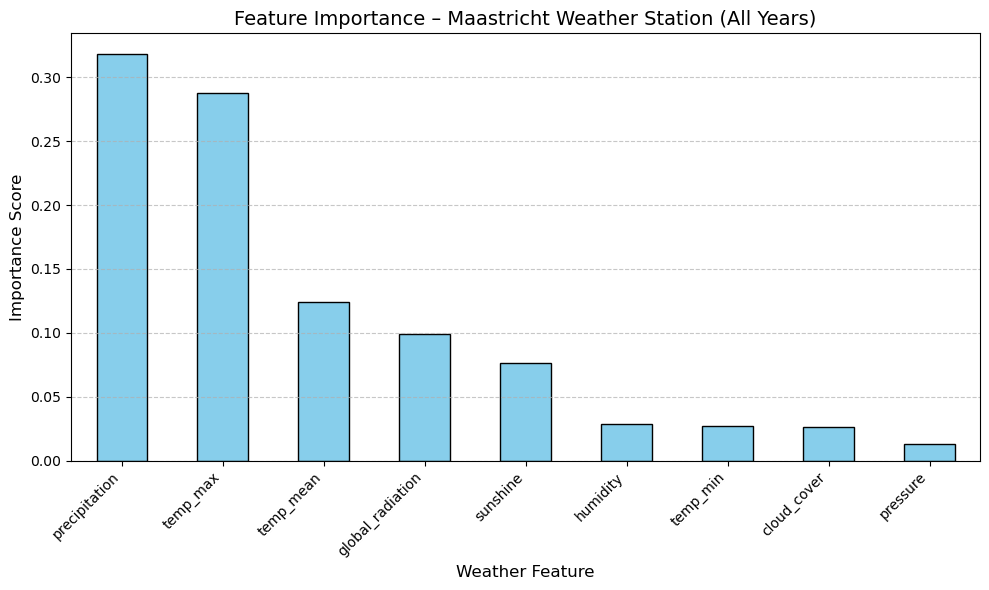

In [53]:
# Plot feature importance

plt.figure(figsize=(10, 6))
important.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Feature Importance – Maastricht Weather Station (All Years)', fontsize=14)
plt.xlabel('Weather Feature', fontsize=12)
plt.ylabel('Importance Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

# Save the figure before showing it
plt.savefig(os.path.join(path, 'Visualizations', 'bar_chart_Maastricht_station_importance.png'), dpi=300, bbox_inches='tight')  # dpi and bbox are optional

plt.show()